In [80]:
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import matplotlib
import pystan 
  
matplotlib.rcParams.update({'font.size': 22})

We will be working with 5 products. We are given embedding of size 5 for each product. 

In [131]:
book, journal, rice, salad, beer = 0,1,2,3,4
name_map = {book: 'book', journal: 'journal', rice: 'rice', salad: 'salad', beer: 'beer'}

In [7]:
product_embeddings = np.array([[1.,0.5,0,0,0],[.1,1,0,0,0],[0,0,1,.1,0],[0,0,0.1,1,0],[0,.0,0,0,1]])
num_products, dim = product_embeddings.shape

In [8]:
product_similarities = product_embeddings*product_embeddings.T

In [119]:
P = 5 # number of products


data = [{'a': city, 'h': [city], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [city], 'I': 1000, 'C': 20},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 1000, 'C': 10},        
        {'a': couscous, 'h': [rice], 'I': 1000, 'C': 20},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 1000, 'C': 20},        
        {'a': couscous, 'h': [couscous], 'I': 1000, 'C': 10},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]


# unlucky in the sense that we get 1/1 click when h=beer and a=city
data_unlucky = [{'a': city, 'h': [city], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [city], 'I': 1000, 'C': 20},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 1000, 'C': 10},        
        {'a': couscous, 'h': [rice], 'I': 1000, 'C': 20},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 1000, 'C': 20},        
        {'a': couscous, 'h': [couscous], 'I': 1000, 'C': 10},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 1, 'C': 1},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]


data_empty = [{'a': city, 'h': [city], 'I': 0, 'C': 0},
        {'a': drone, 'h': [city], 'I': 0, 'C': 0},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 0, 'C': 0},
        {'a': drone, 'h': [drone], 'I': 0, 'C': 0},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [rice], 'I': 0, 'C': 0},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 0, 'C': 0}]

We now define Stan model that will learn product embeddings with signal coming from clicks and impressions. 

In [14]:
script = """
data {
  int N;
  int num_products;
  int dim;

  int clicks[N];
  int impressions[N];  
  int actions[N];

  matrix[N, dim] user_embeddings;
  matrix[num_products, dim] product_embeddings;

  real w1;
  real w2;
}

parameters {
  matrix[dim, dim] eps;
  real offset;
  real rho[num_products];
} 

transformed parameters{
  matrix[num_products, dim] beta;

  beta = w1 * product_embeddings + w2 * product_embeddings * eps;
}

model {
  rho ~ normal(0, 0.1);
  offset ~ normal(-8,2);
  for (k in 1:dim) {
    eps[k] ~ normal(0, 1);
  }

  for (n in 1:N) {
    clicks[n] ~ binomial_logit(impressions[n],  dot_product(user_embeddings[n], 
                              beta[actions[n],:]) + offset + rho[actions[n]]);
  }
}

generated quantities {
  matrix[num_products,num_products] ctr;
  real ctr2[num_products,num_products,num_products];
  real ctr_for_users[N];

  for (n in 1:N) {
    ctr_for_users[n] = inv_logit(dot_product(user_embeddings[n], beta[actions[n],:]) + offset + rho[actions[n]]);
  }

  for (h in 1:num_products) {
    for (action in 1:num_products) {
      ctr[h, action] = inv_logit(dot_product(product_embeddings[h, :], beta[action,:]) + offset + rho[action]);
    }
  }
  
  for (h1 in 1:num_products) {
    for (h2 in 1:num_products) {
      for (action in 1:num_products) {
        ctr2[h1, h2, action] = inv_logit(dot_product((product_embeddings[h1, :]+product_embeddings[h2, :])/2, beta[action,:]) + offset + rho[action]);
      }
    }
  }
}
"""


model = pystan.StanModel(model_code=script)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2c6084743d55de859e958234dd2abeed NOW.


Prepare the data. We will have a log, each line consists of a history h of a user, action a (thing we will recommend), number of impressions I, and number of clicks C. 

In [9]:
def expand_timelines(timeline, product_embeddings):
  num_clicks = timeline['C']
  num_impressions = timeline['I']
  action = timeline['a']
  history_embedding = np.vstack([product_embeddings[h,:] for h in timeline['h']]).mean(0)
  return history_embedding, action, num_clicks, num_impressions

def prepare_data(log, product_embeddings):
  data = np.vstack([np.hstack(expand_timelines(d, product_embeddings)) for d in log])
  user_embeddings = data[:, :dim]
  actions = np.array(data[:, dim], dtype=int)
  clicks = np.array(data[:, dim+1], dtype=int)
  impressions = np.array(data[:, dim+2], dtype=int)
  return user_embeddings, actions, clicks, impressions

Let's first check how the model works when there is no data. What will the model recommend purely based on embeddings. 

In [143]:
def plot_hist(extract, key='ctr', plot_ctr=True):
    mean = extract[key].mean(0).flatten()
    low = mean - np.percentile(extract[key], 2.5,axis=0).flatten()
    up = np.percentile(extract[key], 97.5, axis=0).flatten() - mean


    xnames = ['-'.join(arg) for arg in product(*[name_map.values()]*len(extract[key].mean(0).shape))]

    plt.figure(figsize=(30, 8))

    plt.errorbar(xnames, y=mean.flatten(), yerr=np.vstack((low,up)), fmt='.',ecolor=''.join([c*5 for c in ['b', 'g', 'r', 'c', 'm', 'y', 'k']]))
    plt.plot(xnames, mean.flatten(),'go')
    plt.tick_params(axis='both', which='major', labelsize=15)
    # plt.tick_params(axis='both', which='minor', labelsize=8)
    _ = plt.xticks(rotation=90)

    if len(extract[key].mean(0).shape) == 2 and plot_ctr:
      plt.plot(xnames, (clicks)/(impressions), 'x', c='k')

    
def print_best_rec():
    best_rec = extract['ctr'].mean(0).argmax(1)

    for i in range(num_products):
        print('when hist is ' + list(name_map.values())[i] + ', recommend ' + list(name_map.values())[best_rec[i]])

In [139]:
log = [{'a': book, 'h': [book], 'I': 0, 'C': 0},
        {'a': journal, 'h': [book], 'I': 0, 'C': 0},
        {'a': rice, 'h': [book], 'I': 0, 'C': 0},        
        {'a': salad, 'h': [book], 'I': 0, 'C': 0},
        {'a': beer, 'h': [book], 'I': 0, 'C': 0},        
        {'a': book, 'h': [journal], 'I': 0, 'C': 0},
        {'a': journal, 'h': [journal], 'I': 0, 'C': 0},
        {'a': rice, 'h': [journal], 'I': 0, 'C': 0},                          
        {'a': salad, 'h': [journal], 'I': 0, 'C': 0},
        {'a': beer, 'h': [journal], 'I': 0, 'C': 0},
        {'a': book, 'h': [rice], 'I': 0, 'C': 0},
        {'a': journal, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 0, 'C': 0},        
        {'a': salad, 'h': [rice], 'I': 0, 'C': 0},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': book, 'h': [salad], 'I': 0, 'C': 0},
        {'a': journal, 'h': [salad], 'I': 0, 'C': 0},
        {'a': rice, 'h': [salad], 'I': 0, 'C': 0},        
        {'a': salad, 'h': [salad], 'I': 0, 'C': 0},
        {'a': beer, 'h': [salad], 'I': 0, 'C': 0},
        {'a': book, 'h': [beer], 'I': 0, 'C': 0},
        {'a': journal, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': salad, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 0, 'C': 0}]

user_embeddings, actions, clicks, impressions = prepare_data(log, product_embeddings)

N = user_embeddings.shape[0] 

fit=model.sampling(data={'w1': 1., 'w2': .5, 'clicks': clicks, 'impressions': impressions,
                         'N': N, 'num_products': num_products, 'actions': actions+1,
                         'dim': dim, 'product_embeddings': product_embeddings, 
                         'user_embeddings': user_embeddings})
extract = fit.extract()

print_best_rec()

when hist is book, recommend book
when hist is journal, recommend journal
when hist is rice, recommend rice
when hist is salad, recommend salad
when hist is beer, recommend beer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


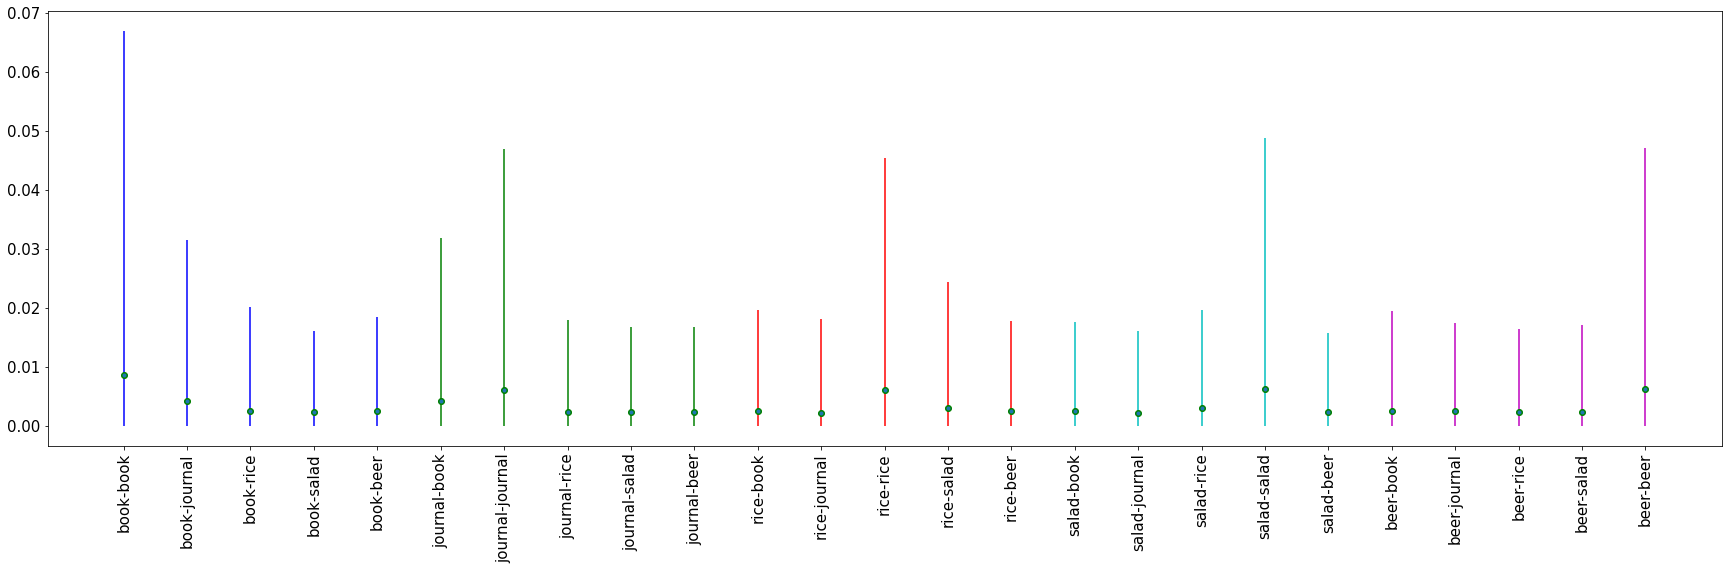

In [140]:
plot_hist(extract, 'ctr', True)

In [144]:
log = [{'a': book, 'h': [book], 'I': 1000, 'C': 100},
        {'a': journal, 'h': [book], 'I': 1000, 'C': 20},
        {'a': rice, 'h': [book], 'I': 0, 'C': 0},        
        {'a': salad, 'h': [book], 'I': 0, 'C': 0},
        {'a': beer, 'h': [book], 'I': 0, 'C': 0},        
        {'a': book, 'h': [journal], 'I': 1000, 'C': 10},
        {'a': journal, 'h': [journal], 'I': 1000, 'C': 10},
        {'a': rice, 'h': [journal], 'I': 0, 'C': 0},                          
        {'a': salad, 'h': [journal], 'I': 0, 'C': 0},
        {'a': beer, 'h': [journal], 'I': 0, 'C': 0},
        {'a': book, 'h': [rice], 'I': 0, 'C': 0},
        {'a': journal, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 1000, 'C': 10},        
        {'a': salad, 'h': [rice], 'I': 1000, 'C': 20},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': book, 'h': [salad], 'I': 0, 'C': 0},
        {'a': journal, 'h': [salad], 'I': 0, 'C': 0},
        {'a': rice, 'h': [salad], 'I': 1000, 'C': 20},        
        {'a': salad, 'h': [salad], 'I': 1000, 'C': 10},
        {'a': beer, 'h': [salad], 'I': 0, 'C': 0},
        {'a': book, 'h': [beer], 'I': 0, 'C': 0},
        {'a': journal, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': salad, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]

Let's now run Stan model and learn parameters of the model. 

In [145]:
user_embeddings, actions, clicks, impressions = prepare_data(log, product_embeddings)

N = user_embeddings.shape[0] 

fit=model.sampling(data={'w1': 1., 'w2': .5, 'clicks': clicks, 'impressions': impressions,
                         'N': N, 'num_products': num_products, 'actions': actions+1,
                         'dim': dim, 'product_embeddings': product_embeddings, 
                         'user_embeddings': user_embeddings})
extract = fit.extract()

Now let's plot the results. 

In [146]:
print_best_rec()

when hist is book, recommend book
when hist is journal, recommend journal
when hist is rice, recommend salad
when hist is salad, recommend rice
when hist is beer, recommend beer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


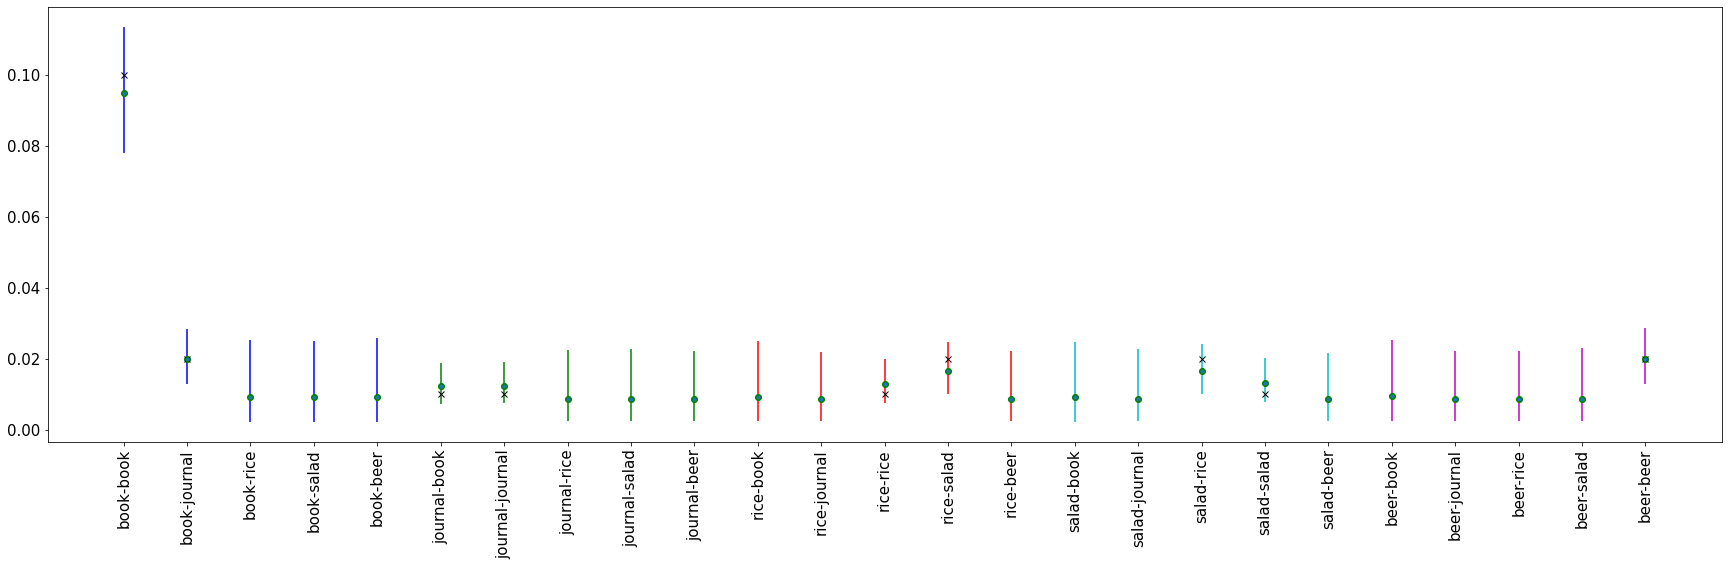

In [147]:
plot_hist(extract, 'ctr', True)

Now let's see if we get an advantage by using the bandit signal

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


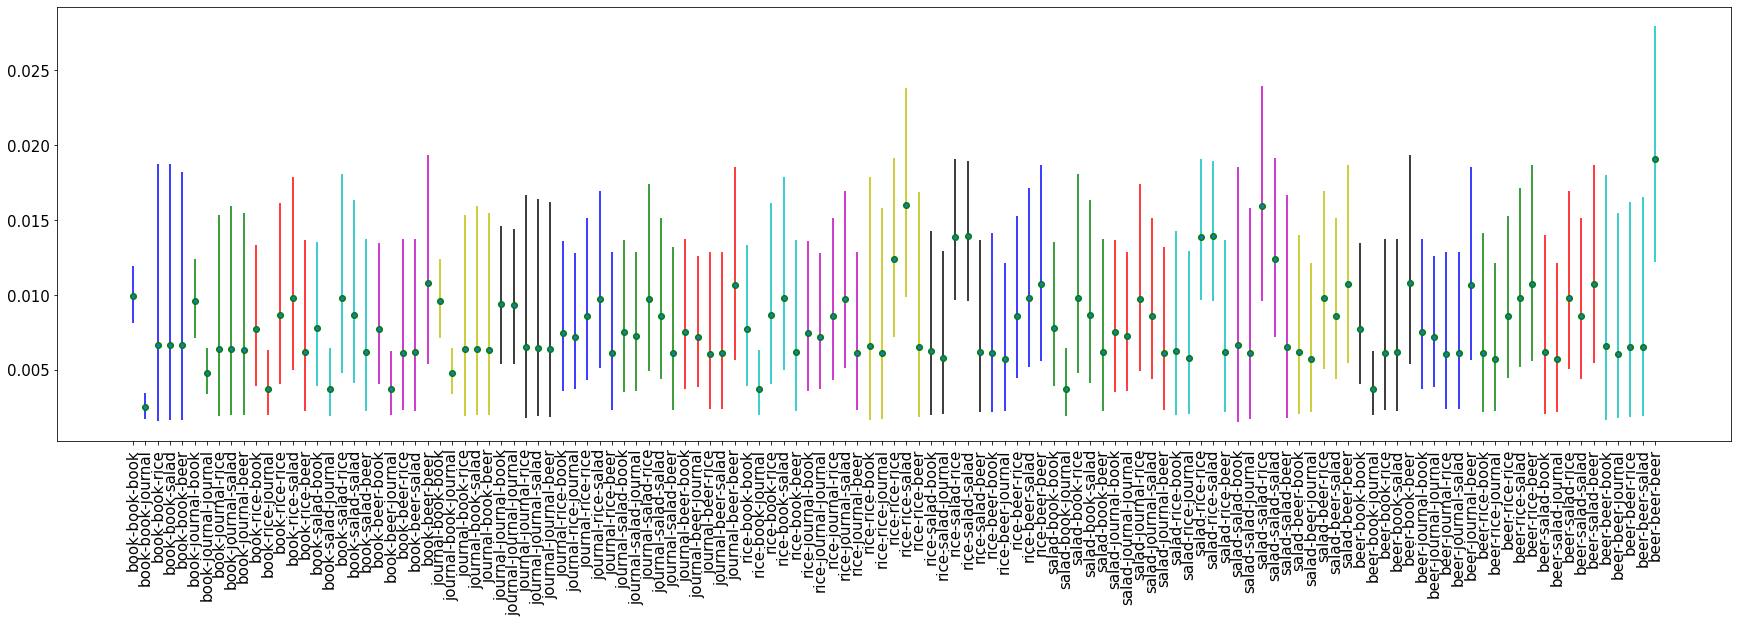

In [113]:
plot_hist(extract, 'ctr2', False)

Let's change the log, so that we have unlucky event. We will have a hisotry with beer, when we showed book, and the user clicked, so we have 100% ctr. 

In [124]:
log[-5] = {'C': 1, 'I': 1, 'a': book, 'h': [beer]}
log

[{'C': 100, 'I': 10000, 'a': 0, 'h': [0]},
 {'C': 20, 'I': 10000, 'a': 1, 'h': [0]},
 {'C': 0, 'I': 0, 'a': 2, 'h': [0]},
 {'C': 0, 'I': 0, 'a': 3, 'h': [0]},
 {'C': 0, 'I': 0, 'a': 4, 'h': [0]},
 {'C': 10, 'I': 1000, 'a': 0, 'h': [1]},
 {'C': 10, 'I': 1000, 'a': 1, 'h': [1]},
 {'C': 0, 'I': 0, 'a': 2, 'h': [1]},
 {'C': 0, 'I': 0, 'a': 3, 'h': [1]},
 {'C': 0, 'I': 0, 'a': 4, 'h': [1]},
 {'C': 0, 'I': 0, 'a': 0, 'h': [2]},
 {'C': 0, 'I': 0, 'a': 1, 'h': [2]},
 {'C': 10, 'I': 1000, 'a': 2, 'h': [2]},
 {'C': 20, 'I': 1000, 'a': 3, 'h': [2]},
 {'C': 0, 'I': 0, 'a': 4, 'h': [2]},
 {'C': 0, 'I': 0, 'a': 0, 'h': [3]},
 {'C': 0, 'I': 0, 'a': 1, 'h': [3]},
 {'C': 20, 'I': 1000, 'a': 2, 'h': [3]},
 {'C': 10, 'I': 1000, 'a': 3, 'h': [3]},
 {'C': 0, 'I': 0, 'a': 4, 'h': [3]},
 {'C': 1, 'I': 1, 'a': 0, 'h': [4]},
 {'C': 0, 'I': 0, 'a': 1, 'h': [4]},
 {'C': 0, 'I': 0, 'a': 2, 'h': [4]},
 {'C': 0, 'I': 0, 'a': 3, 'h': [4]},
 {'C': 20, 'I': 1000, 'a': 4, 'h': [4]}]

In [127]:
user_embeddings, actions, clicks, impressions = prepare_data(log, product_embeddings)

N = user_embeddings.shape[0] 

fit=model.sampling(data={'w1': 1., 'w2': .5, 'clicks': clicks, 'impressions': impressions,
                         'N': N, 'num_products': num_products, 'actions': actions+1,
                         'dim': dim, 'product_embeddings': product_embeddings, 
                         'user_embeddings': user_embeddings})
extract = fit.extract()

In [128]:
print_best_rec()

when hist is city phone, recommend city phone
when hist is drone phone, recommend city phone
when hist is rice, recommend couscous
when hist is couscous, recommend rice
when hist is beer, recommend beer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


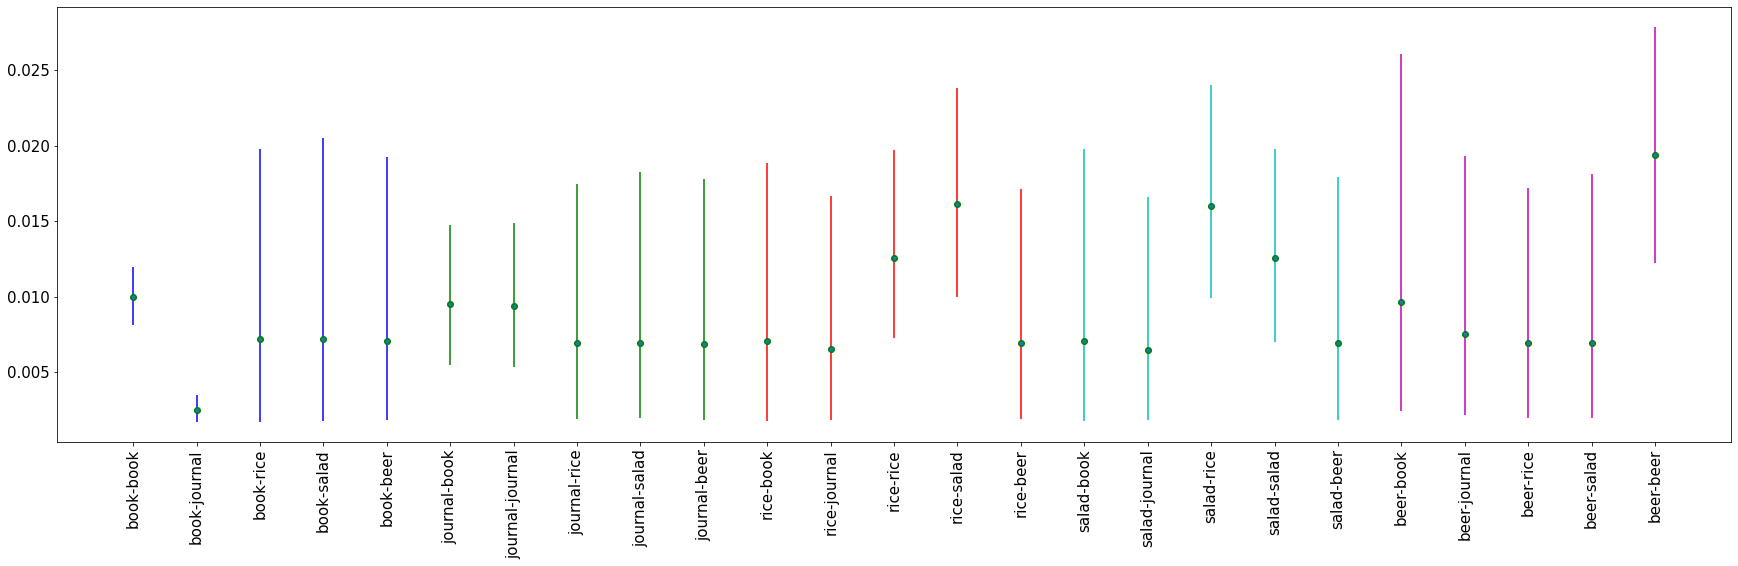

In [133]:
plot_hist(extract, 'ctr', False)

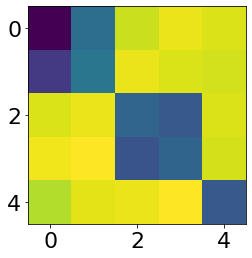

In [136]:
plt.imshow(extract['eps'].std(0))